In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats

In [7]:
data = pd.read_csv("data.csv")
data.head(4)


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation,track performance,mean of Intrinsic motivations
0,0,Weiblich,22,5,"Joggen, Ballsportarten (z.B. Fußball, Handball...",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25,1,4.000000
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50,1,3.500000
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten (z.B. Fußba...",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25,1,3.833333
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten (z.B. Fußball, Hand...",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00,1,4.250000


<ipython-input-8-9dd8bc8c73de>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()


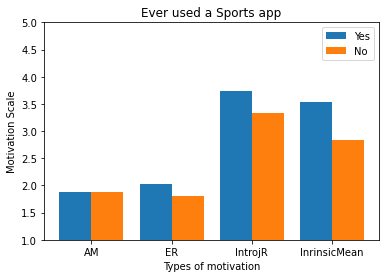

In [8]:
meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()
meandata = meandata[meandata.columns[1:]]
meandata

#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrojR','InrinsicMean'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'No')

plt.xticks(X_axis, X)
plt.ylim(1, 5)
plt.xlabel("Types of motivation")
plt.ylabel("Motivation Scale")
plt.title("Ever used a Sports app")

plt.legend()
plt.savefig('everUsedSportsapp.pdf')
plt.show()

<ipython-input-9-fc929017b9e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Motivation when comparing to friends',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()


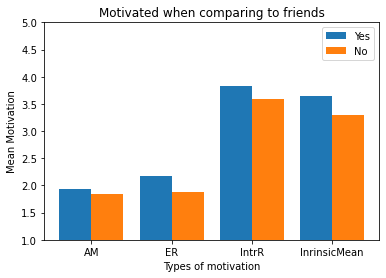

In [9]:
meandata = data.groupby('Motivation when comparing to friends',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()
meandata = meandata[meandata.columns[1:]]

#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrR','InrinsicMean'] # motivation types 

data_yes = meandata.iloc[0].to_list()
data_no = meandata.iloc[1].to_list()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'No')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylim(1, 5)
plt.ylabel("Mean Motivation")
plt.title("Motivated when comparing to friends")
plt.legend()

plt.savefig('comparingToFriends.pdf')
plt.show()

<ipython-input-10-c30e4f0b59d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('track performance',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()


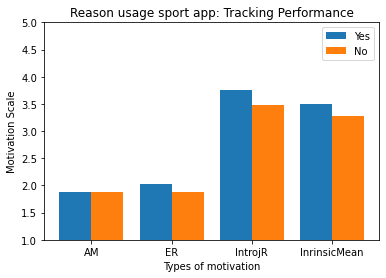

In [10]:
meandata = data.groupby('track performance',as_index=False)['Amotivation','External Regulation','Introjected Regulation','mean of Intrinsic motivations'].mean()
meandata = meandata[meandata.columns[1:]]

#impact of using sports app on different sports motivation types

X = ['AM','ER','IntrojR','InrinsicMean'] # motivation types 

data_yes = meandata.iloc[1].to_list()
data_no = meandata.iloc[0].to_list()
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, data_yes, 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, data_no, 0.4, label = 'No')
  
plt.xticks(X_axis, X)
plt.xlabel("Types of motivation")
plt.ylim(1, 5)
plt.ylabel("Motivation Scale")
plt.title("Reason usage sport app: Tracking Performance")
plt.legend()

plt.savefig('trackingPerf.pdf')
plt.show()

# Use Shapiro-Wilk-Testt to check if data is normally distibuted

In [11]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Introjected Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9568232297897339
0.0010796304559335113


In [12]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Amotivation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9440552592277527
0.00013321063306648284


In [13]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["External Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9446211457252502
0.00014547212049365044


In [14]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Identified Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9716628193855286
0.01671190932393074


In [15]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Integrated Regulation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9190037250518799
3.869223291985691e-06


In [16]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Intrinsic Motivation"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9256382584571838
9.284160114475526e-06


In [20]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["mean of Intrinsic motivations"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.9348748326301575
3.370347621967085e-05


In [17]:
# checking if data is normally distibuted 
shapiro_test = stats.shapiro(data["Frequency Sportapp"])
print(shapiro_test[0])
#p-value: p<= 0.05 
p_value= shapiro_test[1]
print(p_value)

0.8574048280715942
4.86439200031441e-09


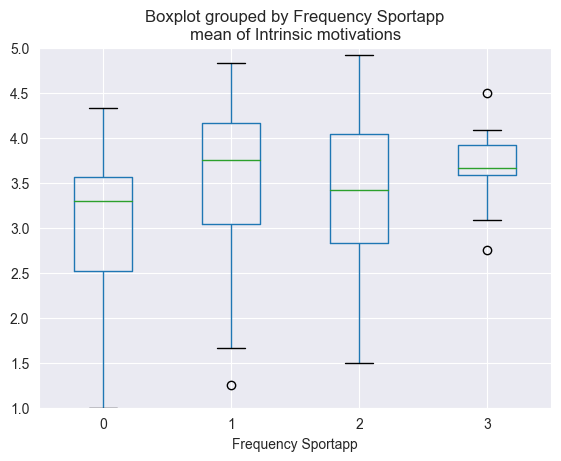

In [32]:
data.boxplot(column='mean of Intrinsic motivations', by='Frequency Sportapp')
plt.ylim(1, 5)
plt.show()

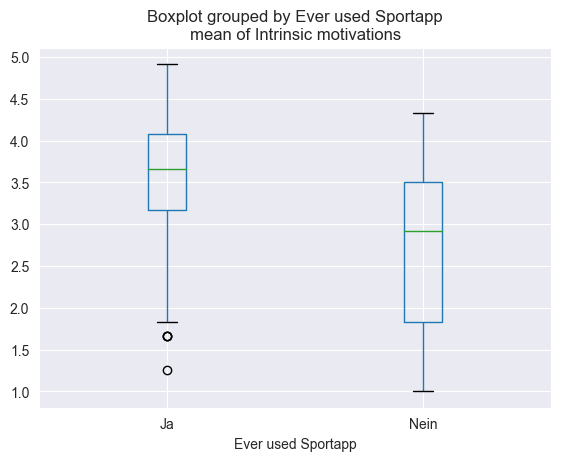

In [15]:
data.boxplot(column='mean of Intrinsic motivations', by='Ever used Sportapp')
plt.ylim(1, 5)
plt.show()

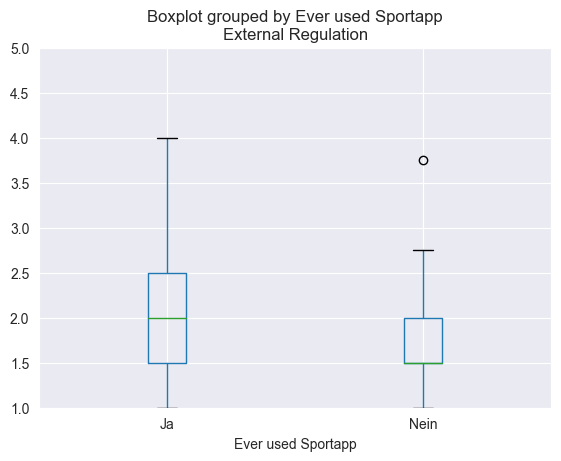

In [33]:
data.boxplot(column='External Regulation', by='Ever used Sportapp')
plt.ylim(1, 5)
plt.show()

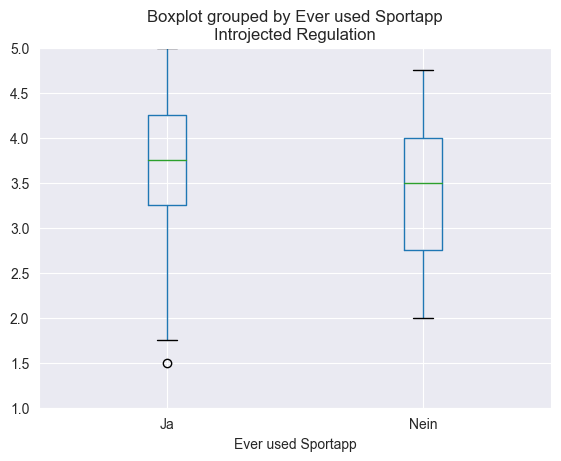

In [34]:
data.boxplot(column='Introjected Regulation', by='Ever used Sportapp')
plt.ylim(1, 5)
plt.show()

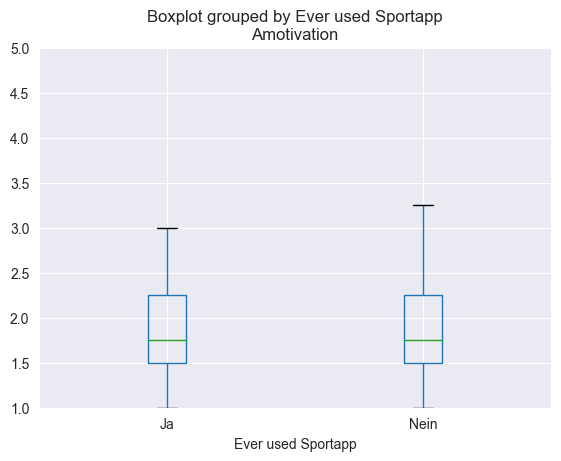

In [35]:
data.boxplot(column='Amotivation', by='Ever used Sportapp')
plt.ylim(1, 5)
plt.show()

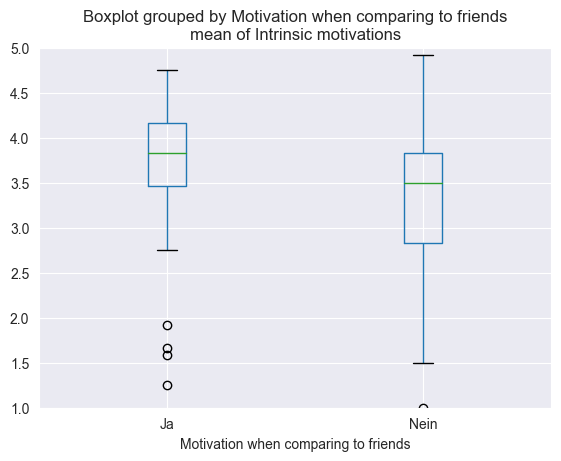

In [36]:
data.boxplot(column='mean of Intrinsic motivations', by='Motivation when comparing to friends')
plt.ylim(1, 5)
plt.show()

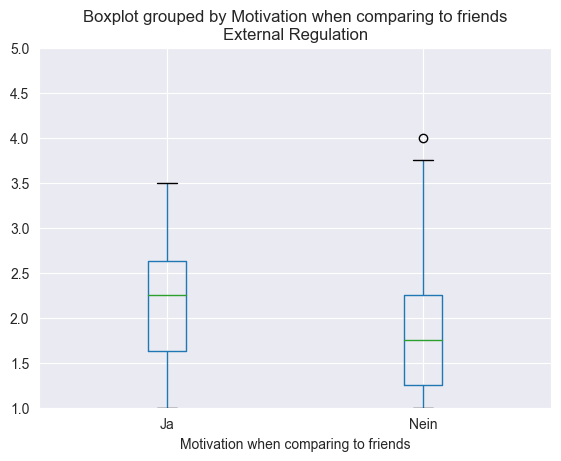

In [37]:
data.boxplot(column='External Regulation', by='Motivation when comparing to friends')
plt.ylim(1, 5)
plt.show()

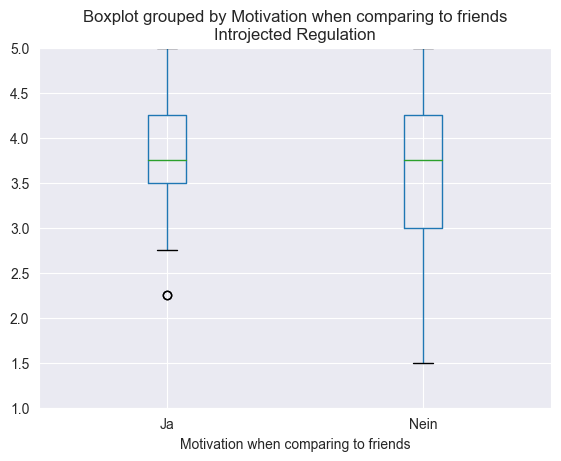

In [39]:
data.boxplot(column='Introjected Regulation', by='Motivation when comparing to friends')
plt.ylim(1, 5)
plt.show()

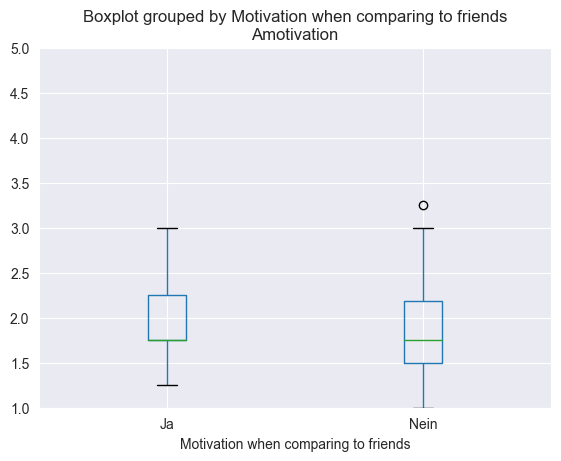

In [40]:
data.boxplot(column='Amotivation', by='Motivation when comparing to friends')
plt.ylim(1, 5)
plt.show()

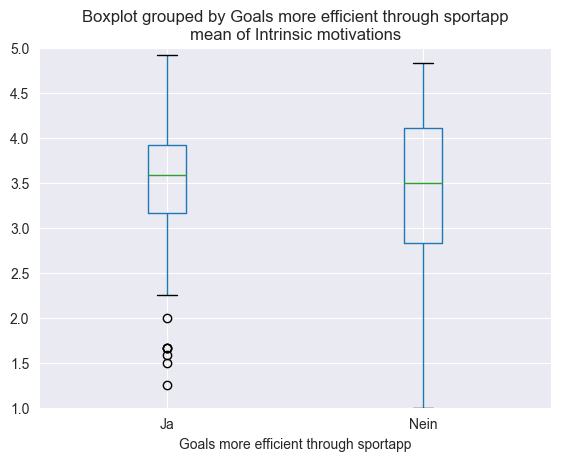

In [41]:
data.boxplot(column='mean of Intrinsic motivations', by='Goals more efficient through sportapp')
plt.ylim(1, 5)
plt.show()

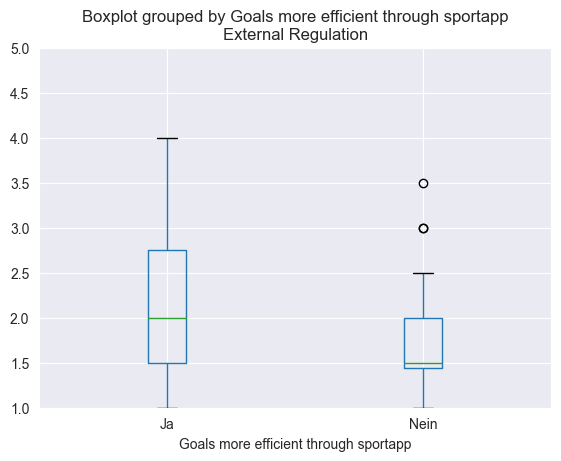

In [42]:
data.boxplot(column='External Regulation', by='Goals more efficient through sportapp')
plt.ylim(1, 5)
plt.show()

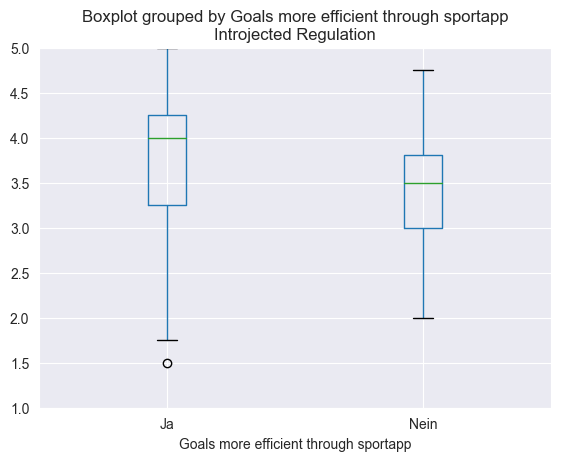

In [43]:
data.boxplot(column='Introjected Regulation', by='Goals more efficient through sportapp')
plt.ylim(1, 5)
plt.show()

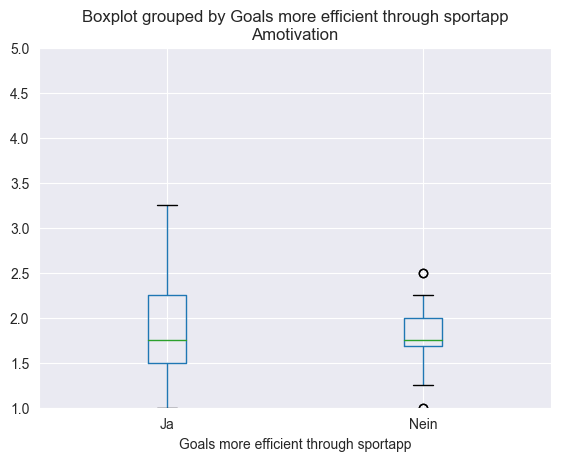

In [44]:
data.boxplot(column='Amotivation', by='Goals more efficient through sportapp')
plt.ylim(1, 5)
plt.show()

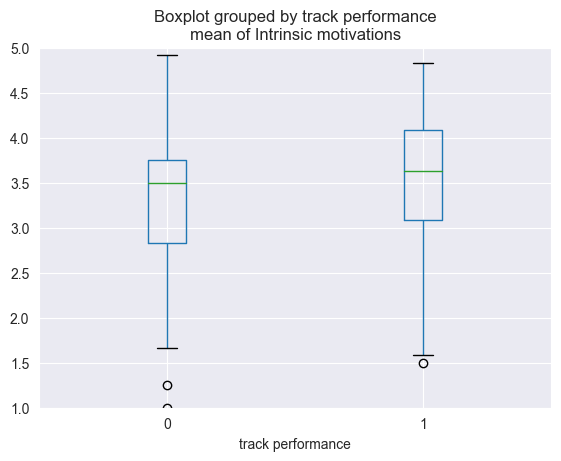

In [45]:
data.boxplot(column='mean of Intrinsic motivations', by='track performance')
plt.ylim(1, 5)
plt.show()

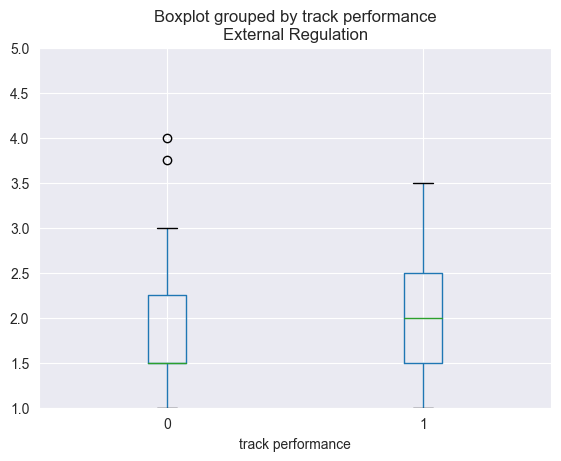

In [46]:
data.boxplot(column='External Regulation', by='track performance')
plt.ylim(1, 5)
plt.show()

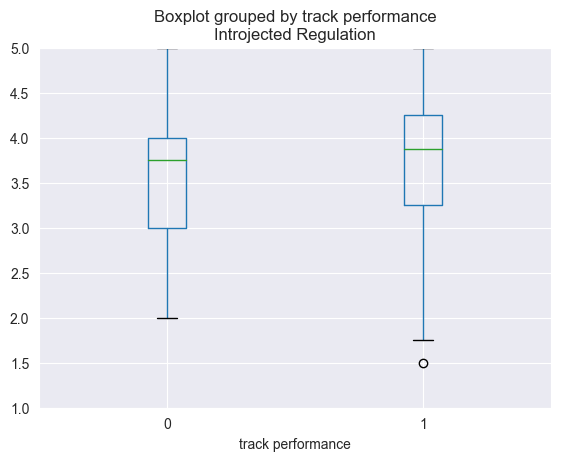

In [47]:
data.boxplot(column='Introjected Regulation', by='track performance')
plt.ylim(1, 5)
plt.show()

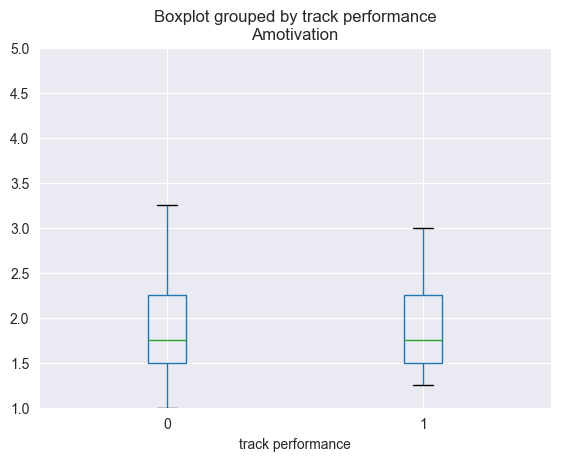

In [48]:
data.boxplot(column='Amotivation', by='track performance')
plt.ylim(1, 5)
plt.show()